In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('movie_metadata.csv')

In [3]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [4]:
df.head(4)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000


In [5]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [6]:
max(df['budget'])

12215500000.0

In [7]:
def scale_feature(input_val, max_val = 1000000000.0):
    return 2*(input_val-0)/(max_val-0)-1

In [8]:
def feature_conv(col, df, non_numeric = False, use_col_max = False, use_one_mil = False, use_one_bil = False, use_five_mil = False, use_fifty_bil = False):
    #unique_vals = df[col].unique()
    new_vals = list(df[col])
    
    if non_numeric == True:
        unique_vals = dict([x for x in enumerate(df[col].unique())])
        unique_vals = {value: float(key) for key, value in unique_vals.items()} #this line turns keys to values and values to keys
        new_vals = []

        for val in df[col]:
            new_vals.append(unique_vals[val])
    
    max_val = None
    scaled_vals = []
    
    if use_col_max == True:
        max_val = max(new_vals)
    else:
        max_val = 1000000000000.0
        if use_fifty_bil == True:
            max_val = 5000000000.0
        if use_one_bil == True:
            max_val = 1000000000.0
        if use_five_mil == True:
            max_val = 5000000.0
        if use_one_mil == True:
            max_val = 1000000.0
    
    for input_val in new_vals:
        scaled_vals.append(scale_feature(input_val, max_val))
    
    df[col] = scaled_vals

In [9]:
def genre_features(df, col):
    import re
    unique_genre = set()
    for item in df[col]:
        text = item
        pattern = r'b|\w+\b'
        matches = re.findall(pattern, text)
        unique_genre.update(matches)
    for genre in unique_genre:
        df[genre] = 0
        col_content = []
        for item in df[col]:
            text = item
            pattern = r'b|\w+\b'
            matches = re.findall(pattern, text)
            if genre in matches:
                col_content.append(1)
            else:
                col_content.append(0)
        df[genre] = col_content

In [10]:
df = df.dropna()

In [11]:
len(df)

3756

In [12]:
df['budget'].max()

12215500000.0

In [13]:
df['aspect_ratio']

0       1.78
1       2.35
2       2.35
3       2.35
5       2.35
        ... 
5026    2.35
5027    1.85
5033    1.85
5035    1.37
5042    1.85
Name: aspect_ratio, Length: 3756, dtype: float64

In [14]:
#feature_conv('budget', df)

In [15]:
min(df['budget'])

218.0

In [16]:
genre_features(df, 'genres')

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_4756\2528095986.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[genre] = 0
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_4756\2528095986.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[genre] = col_content
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_4756\2528095986.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_4756\2528095986.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[genre] = col_content
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_4756\2528095986.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[genre] = 0
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_4756\2528095986.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [17]:
#df

In [18]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'Fantasy',
       'Biography', 'Animation', 'Music', 'Drama', 'Film', 'Noir', 'Comedy',
       'Documentary', 'Romance', 'Crime', 'Fi', 'Musical', 'Thriller',
       'Mystery', 'Sport', 'Adventure', 'Family', 'War', 'Horror', 'Sci',
       'Action', 'History', 'Western'],
      dtype='object')

In [19]:
#'content_rating'

In [20]:
feature_conv('director_name', df, non_numeric = True, use_col_max = True)
feature_conv('num_critic_for_reviews', df, non_numeric = False, use_col_max = True)
feature_conv('duration', df, non_numeric = False, use_col_max = True)
feature_conv('director_facebook_likes', df, non_numeric = False, use_col_max = True, use_one_mil=True)
feature_conv('actor_3_facebook_likes', df, non_numeric = False, use_col_max = True, use_one_mil=True)
feature_conv('actor_1_facebook_likes', df, non_numeric = False, use_col_max = True, use_one_mil=True)
feature_conv('gross', df, non_numeric = False, use_col_max = False)
feature_conv('actor_1_name', df, non_numeric = True, use_col_max = True)
feature_conv('num_voted_users', df, non_numeric = False, use_col_max = False, use_five_mil = True)
feature_conv('cast_total_facebook_likes', df, non_numeric = False, use_col_max = False, use_one_bil = True)
feature_conv('num_user_for_reviews', df, non_numeric = False, use_col_max = True)
feature_conv('language', df, non_numeric = True, use_col_max = True)
feature_conv('country', df, non_numeric = True, use_col_max = True)
feature_conv('content_rating', df, non_numeric = True, use_col_max = True)
feature_conv('budget', df, non_numeric = False, use_col_max = False)
feature_conv('imdb_score', df, non_numeric = False, use_col_max = True)
feature_conv('aspect_ratio', df, non_numeric = False, use_col_max = True)
feature_conv('movie_facebook_likes', df, non_numeric = False, use_col_max = False, use_one_bil = True)
feature_conv('actor_2_facebook_likes', df, non_numeric = False, use_col_max = False, use_one_mil=True)

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_4756\3625213529.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = scaled_vals


In [21]:
#'director_name', 'num_critic_for_reviews', 'duration',
#       'director_facebook_likes', 'actor_3_facebook_likes',
#       'actor_1_facebook_likes', 'gross', 'actor_1_name',
 #      'num_voted_users', 'cast_total_facebook_likes',
  #     'num_user_for_reviews', 'language', 'country',
   #    'content_rating', 'budget', 'actor_2_facebook_likes',
    #   'imdb_score', 'aspect_ratio', 'movie_facebook_likes',
df = df[[ 'Fi', 'Animation',
       'Action', 'Comedy', 'Musical', 'Western', 'Romance', 'War', 'Thriller',
       'Documentary', 'Horror', 'Family', 'Sci', 'Sport', 'Drama', 'Fantasy',
       'History', 'Biography', 'Adventure', 'Crime', 'Music', 'Film', 'Noir',
       'Mystery']]

In [22]:
#df['cast_total_facebook_likes'].unique()

In [23]:
df.corr()

,Fi,Animation,Action,Comedy,Musical,Western,Romance,War,Thriller,Documentary,...,Drama,Fantasy,History,Biography,Adventure,Crime,Music,Film,Noir,Mystery
Fi,1.000000,0.060528,0.296424,-0.106356,-0.048223,-0.036627,-0.143120,-0.076115,0.117837,-0.042953,...,-0.228037,0.013919,-0.079278,-0.101682,0.249713,-0.143944,-0.063817,-0.006365,-0.006365,0.026712
Animation,0.060528,1.000000,-0.038556,0.178670,0.166813,-0.000759,-0.076462,-0.023887,-0.139560,-0.014835,...,-0.171874,0.243640,-0.035423,-0.046454,0.301610,-0.097889,-0.005361,-0.003829,-0.003829,-0.051521
Action,0.296424,-0.038556,1.000000,-0.191659,-0.087095,0.038968,-0.195278,0.028477,0.300279,-0.058868,...,-0.270289,0.043868,-0.022034,-0.117623,0.319850,0.149750,-0.094972,-0.009556,-0.009556,-0.048460
Comedy,-0.106356,0.178670,-0.191659,1.000000,0.050724,-0.052483,0.177968,-0.119514,-0.392448,-0.042685,...,-0.259232,0.036420,-0.145376,-0.154297,-0.033361,-0.077852,0.028536,-0.013021,-0.013021,-0.207961
Musical,-0.048223,0.166813,-0.087095,0.050724,1.000000,-0.006892,0.068465,-0.016138,-0.097985,-0.017834,...,0.002081,0.069324,-0.006986,0.026895,0.020944,-0.047946,0.087091,-0.002643,-0.002643,-0.043516
Western,-0.036627,-0.000759,0.038968,-0.052483,-0.006892,1.000000,-0.002515,0.039251,-0.040031,-0.013911,...,0.031109,-0.037371,0.040145,0.010927,0.040794,0.004721,-0.014954,-0.002062,-0.002062,-0.028496
Romance,-0.143120,-0.076462,-0.195278,0.177968,0.068465,-0.002515,1.000000,-0.002453,-0.226682,-0.059963,...,0.164911,-0.042578,-0.016487,-0.030280,-0.139981,-0.133075,0.053138,-0.008886,-0.008886,-0.104246
War,-0.076115,-0.023887,0.028477,-0.119514,-0.016138,0.039251,-0.002453,1.000000,-0.050849,0.027058,...,0.165901,-0.057402,0.338982,0.101448,-0.002017,-0.081801,-0.021396,-0.003351,-0.003351,-0.042545
Thriller,0.117837,-0.139560,0.300279,-0.392448,-0.097985,-0.040031,-0.226682,-0.050849,1.000000,-0.066289,...,-0.023253,-0.108709,-0.069563,-0.100400,-0.041997,0.349997,-0.118325,0.025084,0.025084,0.311067
Documentary,-0.042953,-0.014835,-0.058868,-0.042685,-0.017834,-0.013911,-0.059963,0.027058,-0.066289,1.000000,...,-0.071847,-0.043500,0.052843,0.051495,-0.050391,-0.021852,0.089581,-0.001797,-0.001797,-0.037161


In [24]:
df

,Fi,Animation,Action,Comedy,Musical,Western,Romance,War,Thriller,Documentary,...,Drama,Fantasy,History,Biography,Adventure,Crime,Music,Film,Noir,Mystery
0,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
5027,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5033,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
5035,0,0,1,0,0,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [25]:
import random
#create a column and call it my likes, that'll be the target col/.'?'
#likes = [random.randint(0, 1) for value in df['imdb_score']]
likes = [1 if value >= 1 else 0 for value in df['Adventure']]
df['likes'] = likes

In [26]:
df['likes'].value_counts()

0    2975
1     781
Name: likes, dtype: int64

In [27]:
df.head(3)

,Fi,Animation,Action,Comedy,Musical,Western,Romance,War,Thriller,Documentary,...,Fantasy,History,Biography,Adventure,Crime,Music,Film,Noir,Mystery,likes
0,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
#create an ANN class
class movieModel(nn.Module):
    def __init__(self, input_size):
        super(movieModel, self).__init__()
        self.fc1 = nn.Linear(input_size, input_size*4)
        self.fc2 = nn.Linear(input_size*4, input_size*3)
        self.fc3 = nn.Linear(input_size*3, input_size*2)
        self.fc4 = nn.Linear(input_size*2, 16)
        self.fc5 = nn.Linear(16, 1)
        
        self.dropout = nn.Dropout(0.25)
        self.inp_s = input_size
    def forward(self, x):
        #x = x.double()
        #x = x.view(43, 1)
        #print(self.inp_s)
        #print(x)
        #print(self.fc1.weight.dtype)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = self.dropout(F.relu(self.fc4(x)))
        x = self.dropout(F.sigmoid(self.fc5(x)))
        return x

In [29]:
import torch
import torch.nn as nn

class BinaryClassifier(nn.Module):
    def __init__(self, i):
        super(BinaryClassifier, self).__init__()
        self.fc1 = nn.Linear(24, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = nn.functional.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = nn.functional.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x


In [30]:
len(df)

3756

In [31]:
df = df.sample(frac=1).reset_index()

In [32]:
df = df.drop(columns = ['index'])

In [33]:
#df[int((20/100)*len(df)):]

In [34]:
#data load it and split train and test
import torch
from torchvision import datasets
from torchvision import transforms

len_df = int((75/100)*len(df))
train_df = df[:len_df]
test_df = df[len_df:]

# Tensor transform
transforms = transforms.Compose([transforms.ToTensor()])

# training datasets
#svhn_train = datasets.SVHN(root='data/', split='train', download=True, transform=transform)
train_df = transforms(train_df.values)[0]
test_df = transforms(test_df.values)[0]

batch_size = 10
num_workers = 0

print(train_df)
#batched_data = torch.stack([train_df[i:i+batch_size] for i in range(0, len(train_df), batch_size)])
def batch_maker():
    b = []
    for i in range(len(train_df)-batch_size):
        b.append((train_df[i:i+batch_size]))
    return b
#print(batched_data)

# build DataLoaders for SVHN dataset
train_loader = torch.utils.data.DataLoader(dataset=train_df,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(dataset=test_df,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=num_workers)
train_loader = torch.stack(batch_maker())
len(df.columns)

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 1]])


25

In [35]:
import torch

len_df = int((75/100)*len(df))
train_df = df[:len_df]
test_df = df[len_df:]

def perfect_batches(df, batch_size):
    batched_data = []
    if len(df)%batch_size != 0:
        print('Cannot create a perfect batch size with the input. \nTry the following: ')
        for i in range(len(df)):
            if i != 0 and len(df)%i == 0:
                print('This number can do: ', i)
        print('\n\nEnd of numbers!')
        return None
    for i in range(len(df)-batch_size+1):
        batch = []
        i_inc = i
        for j in range(batch_size):
            #print(df.values[i])
            batch.append(torch.tensor(df.values[i_inc]))
            i_inc += 1
        #print(batch)
        batched_data.append(torch.stack(batch))
    return torch.stack(batched_data)

In [36]:
def perfect_batches2(df, batch_size):
    batched_data = []
    if len(df)%batch_size != 0:
        print('Cannot create a perfect batch size with the input. \nTry the following: ')
        for i in range(len(df)):
            if i != 0 and len(df)%i == 0:
                print('This number can do: ', i)
        print('\n\nEnd of numbers!')
        return None
    i = 0
    while i <= len(df)-batch_size+1:
        batch = []
        j = 0
        while j <= batch_size:
            batch.append(torch.tensor(df.values[i]))
            i += 1
            j += 1
        batched_data.append(torch.stack(batch))
    return torch.stack(batched_data).float()

In [37]:
batched_train = perfect_batches2(train_df, 313)

In [38]:
batched_test = perfect_batches2(test_df, 313)

In [39]:
#batched_train

In [40]:
#torch.stack(batch_maker())

In [41]:
#train_df


In [42]:
len(df.columns)

25

In [43]:
len(train_df)

2817

In [44]:
#len(train_loader)

In [45]:
import torch.optim as optim

In [46]:
def modelAndOptim(input_len, lr):
    #modell = movieModel(input_len)
    modell = BinaryClassifier(input_len)
    optimizer = optim.SGD(modell.parameters(), lr)
    loss_func = nn.BCEWithLogitsLoss()
    return modell, optimizer, loss_func

In [47]:
import matplotlib.pyplot as plt

In [48]:
import torch
#v = torch.tensor([1.0, 6.9, 0, 8.0, 1.1, 0, 7.0, 2.4, 9.0, 8,4])
#a = torch.tensor([1.0, 9.9, 0, 6.0, 1.1, 0, 2.0, 2.4, 9.0, 8,3])

In [49]:
def accuracy(pred, actual):
    pred = torch.tensor([1.0 if i >= 0.7 else 0.0 for i in pred])
    #print('preddd: ', pred)
    #actual = torch.tensor([1 if i >= 7.0 else 0 for i in actual])
    same = []
    for i in range(len(pred)):
        if pred[i] == actual[i]:
            same.append(1)
        else:
            same.append(0)
    same = torch.tensor(same)
    #print(pred)
    #print(actual)
    #print(same)
    return (sum(same)/len(same)).item()
    
#accuracy(v, a)

In [50]:
#create another train model here

In [51]:
#create a train method and validation
#Theres an error i spotted i have to make sure that it loops through the batch one at a time not all at once
model, optimizer, loss = modelAndOptim(24, 0.008)
def train(epoch, train_data, model, optimizer, loss):
    model.train()
    #model = model.double()
    sum_loss = []
    accuracy_count = []
    for e in range(epoch):
        losses = []
        #acc = []
        acc = None
        
        #train_data = next(iter(train_data)).type(torch.float32)
        #print('train_data')
        #print(train_data)
        #print(train_data[0, :-1])
        #print(train_data[0, :])
        for batch in train_data:
            #for rec in batch:
            features = batch[:, :-1]
            #print(features)
            label = batch[:, -1]
            #print(features.shape)
            optimizer.zero_grad()

            predicted = model(features)
            #print('predited')
            #print('p: ', predicted)
            #print('l: ', label)
            predicted = predicted.view(314, 1)
            label = label.view(314, 1)
            #print('pridicted size: ', predicted.shape)
            #print('label dType: ', label.shape)
            #print('pridicted: ', predicted)
            #print('label: ', label)
            loss_error = loss(predicted.double(), label.double())
            losses.append(loss_error.item())
            loss_error.backward()
            optimizer.step()
            #acc.append(accuracy(predicted.view(-1), label.view(-1)))
            acc = accuracy(predicted.view(-1), label.view(-1))
            #print('Average error at current  ', sum(losses)/len(losses))
            #print('done')
        #print(predicted)
        print('Average error at ',e,' epoch:  ', sum(losses)/len(losses))
        #acr = sum(acc)/len(acc)
        acr = acc
        print('Accuracy: ', acr)
        accuracy_count.append(acr)
        sum_loss.append(sum(losses)/len(losses))
        if acr >= 0.999:
            plt.plot(sum_loss, label = 'loss')
            #print(sum_loss)
            plt.legend()
            plt.show()
            return predicted, label
    print('\nOverall Accuracy: ', sum(accuracy_count)/len(accuracy_count))
    print('\n\n\n\n')
    #plt.plot(label, label = 'True')
    plt.plot(sum_loss, label = 'loss')
    #print(sum_loss)
    plt.legend()
    plt.show()
    print('end of train')
    print("")
    return predicted, label

In [52]:
def train_model(model, train_loader, optimizer, criterion, num_epochs):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            print(data)
            inputs, labels = data[:, :-1], data[:, -1]
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels.float().unsqueeze(1))
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print('Epoch [%d/%d], Loss: %.4f' %
              (epoch+1, num_epochs, running_loss / len(train_loader)))

    print('Finished Training')


In [53]:
def test(epoch, test_data, model, optimizer, loss):
    model.eval()
    #model = model.float()
    pred_labels = []
    actual_labels = []
    for e in range(epoch):
        losses = []
        print(len(test_data))
        
        #train_data = next(iter(train_data)).type(torch.float32)
        #print('train_data')
        #print(train_data)
        #print(train_data[0, :-1])
        #print(train_data[0, :])
        for batch in test_data:
            features = batch[:, :-1]
            #print(features)
            label = batch[:, -1]
            #print(features.shape)

            predicted = model(features)
            #print(predicted)
            predicted = predicted.view(314, 1)
            pred_labels.append(predicted)
            label = label.view(314, 1)
            actual_labels.append(label)
            #print('pridicted size: ', predicted.shape)
            #print('label dType: ', label.shape)
            #print('pridicted: ', predicted)
            #print('label: ', label)
            loss_error = loss(predicted, label)
            losses.append(loss_error.item())
            acc = accuracy(predicted.view(-1), label.view(-1))
            print('Accuracy: ', acc)
            #loss_error.backward()
            #optimizer.step()
            #print('done')
        #print(predicted)
        print('Average error at ',e,' epoch:  ', sum(losses)/len(losses))
    print('\n\n\n\n')
    print('end of test')
    print("")
    return pred_labels, actual_labels

In [54]:
#train_model(model, batched_train, optimizer, loss, 200)

Average error at  0  epoch:   0.8393479955215407
Accuracy:  0.7834395170211792
Average error at  1  epoch:   0.835035245874156
Accuracy:  0.7834395170211792
Average error at  2  epoch:   0.8311182629105343
Accuracy:  0.7834395170211792
Average error at  3  epoch:   0.8286827114837039
Accuracy:  0.7802547812461853
Average error at  4  epoch:   0.8232515108132787
Accuracy:  0.7802547812461853
Average error at  5  epoch:   0.820809929900526
Accuracy:  0.7929936051368713
Average error at  6  epoch:   0.817780183005872
Accuracy:  0.7929936051368713
Average error at  7  epoch:   0.8140049329150987
Accuracy:  0.7866241931915283
Average error at  8  epoch:   0.8112053565194646
Accuracy:  0.7866241931915283
Average error at  9  epoch:   0.8085221383891569
Accuracy:  0.7802547812461853
Average error at  10  epoch:   0.8045970235739437
Accuracy:  0.7929936051368713
Average error at  11  epoch:   0.8019610367161055
Accuracy:  0.7898089289665222
Average error at  12  epoch:   0.7997108179447416
Acc

Average error at  104  epoch:   0.6923844513005841
Accuracy:  0.8025477528572083
Average error at  105  epoch:   0.6925722782363096
Accuracy:  0.7898089289665222
Average error at  106  epoch:   0.6916756986908962
Accuracy:  0.7961783409118652
Average error at  107  epoch:   0.6919432328453804
Accuracy:  0.7929936051368713
Average error at  108  epoch:   0.6904452271529403
Accuracy:  0.7993630766868591
Average error at  109  epoch:   0.6905010902933953
Accuracy:  0.808917224407196
Average error at  110  epoch:   0.6905150628185964
Accuracy:  0.8025477528572083
Average error at  111  epoch:   0.6904895894192304
Accuracy:  0.7993630766868591
Average error at  112  epoch:   0.6896899342192006
Accuracy:  0.7898089289665222
Average error at  113  epoch:   0.6880167379106212
Accuracy:  0.808917224407196
Average error at  114  epoch:   0.6893367290544937
Accuracy:  0.7929936051368713
Average error at  115  epoch:   0.6885217607892564
Accuracy:  0.8025477528572083
Average error at  116  epoch: 

Average error at  206  epoch:   0.6539765472927518
Accuracy:  0.8949044346809387
Average error at  207  epoch:   0.6557043349898508
Accuracy:  0.8789808750152588
Average error at  208  epoch:   0.6544216233605398
Accuracy:  0.9203821420669556
Average error at  209  epoch:   0.653650358073345
Accuracy:  0.9108280539512634
Average error at  210  epoch:   0.6544622842294939
Accuracy:  0.9012739062309265
Average error at  211  epoch:   0.6534876776352438
Accuracy:  0.9140127301216125
Average error at  212  epoch:   0.6541205136598514
Accuracy:  0.8949044346809387
Average error at  213  epoch:   0.6528455430332982
Accuracy:  0.9203821420669556
Average error at  214  epoch:   0.653480650399286
Accuracy:  0.9140127301216125
Average error at  215  epoch:   0.6530230660762479
Accuracy:  0.9171974658966064
Average error at  216  epoch:   0.6513436139489488
Accuracy:  0.9203821420669556
Average error at  217  epoch:   0.6527768581644524
Accuracy:  0.9076433181762695
Average error at  218  epoch: 

Average error at  308  epoch:   0.6393040281531225
Accuracy:  0.9649681448936462
Average error at  309  epoch:   0.6393699469838499
Accuracy:  0.9649681448936462
Average error at  310  epoch:   0.6384769500883805
Accuracy:  0.9713375568389893
Average error at  311  epoch:   0.6384018863513772
Accuracy:  0.9522293210029602
Average error at  312  epoch:   0.6393351743927373
Accuracy:  0.9681528806686401
Average error at  313  epoch:   0.6389448099043118
Accuracy:  0.9554139971733093
Average error at  314  epoch:   0.6385806880595613
Accuracy:  0.9522293210029602
Average error at  315  epoch:   0.6382854483422217
Accuracy:  0.9490445852279663
Average error at  316  epoch:   0.638064829550629
Accuracy:  0.9617834687232971
Average error at  317  epoch:   0.6385938337087282
Accuracy:  0.9713375568389893
Average error at  318  epoch:   0.6380894805912884
Accuracy:  0.9585987329483032
Average error at  319  epoch:   0.6386724929876669
Accuracy:  0.9585987329483032
Average error at  320  epoch:

Average error at  411  epoch:   0.6317743342608284
Accuracy:  0.987261176109314
Average error at  412  epoch:   0.630915075863369
Accuracy:  0.987261176109314
Average error at  413  epoch:   0.6307251563223881
Accuracy:  0.9904458522796631
Average error at  414  epoch:   0.6315978730746062
Accuracy:  0.9904458522796631
Average error at  415  epoch:   0.6315054565584003
Accuracy:  0.987261176109314
Average error at  416  epoch:   0.6316546701393306
Accuracy:  0.9808917045593262
Average error at  417  epoch:   0.6315258220838095
Accuracy:  0.9713375568389893
Average error at  418  epoch:   0.6323135189066706
Accuracy:  0.9617834687232971
Average error at  419  epoch:   0.6310618035081094
Accuracy:  0.9745222926139832
Average error at  420  epoch:   0.6308876413862298
Accuracy:  0.977707028388977
Average error at  421  epoch:   0.6311862111634772
Accuracy:  0.977707028388977
Average error at  422  epoch:   0.6311945756034592
Accuracy:  0.987261176109314
Average error at  423  epoch:   0.6

Average error at  513  epoch:   0.6276214243889692
Accuracy:  0.987261176109314
Average error at  514  epoch:   0.6274791668304316
Accuracy:  0.993630588054657
Average error at  515  epoch:   0.6279556626483653
Accuracy:  0.9904458522796631
Average error at  516  epoch:   0.6277920163152232
Accuracy:  0.9968152642250061
Average error at  517  epoch:   0.6275285822095505
Accuracy:  0.9808917045593262
Average error at  518  epoch:   0.6276985836960352
Accuracy:  0.9904458522796631
Average error at  519  epoch:   0.6277834693720825
Accuracy:  0.987261176109314
Average error at  520  epoch:   0.6285016477597385
Accuracy:  0.977707028388977
Average error at  521  epoch:   0.6281724810115026
Accuracy:  0.9840764403343201
Average error at  522  epoch:   0.6275500591761465
Accuracy:  0.9840764403343201
Average error at  523  epoch:   0.6273720354207218
Accuracy:  0.9904458522796631
Average error at  524  epoch:   0.6277424952576038
Accuracy:  0.9904458522796631
Average error at  525  epoch:   

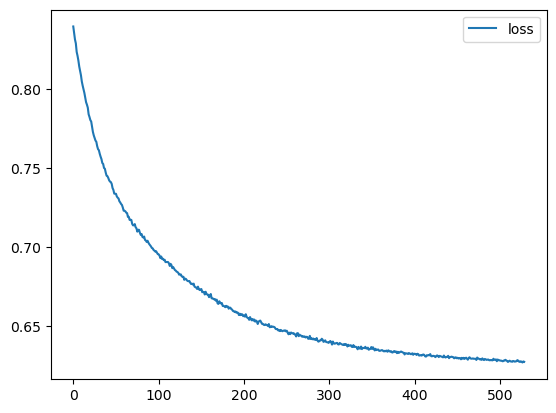

In [55]:
p, l = train(5000, batched_train, model, optimizer, loss)
#at first it errors and i tink it has to do with reshaping of the predicted...

In [56]:
a = accuracy(p.view(-1), l.view(-1))

In [57]:
a

1.0

In [58]:
p.view(-1)

tensor([7.6939e-03, 1.6656e-03, 2.3245e-02, 1.0905e-02, 1.2626e-02, 8.4715e-01,
        9.7049e-01, 1.0227e-02, 1.3083e-03, 6.4956e-03, 7.6901e-03, 9.1521e-01,
        8.4133e-01, 3.1540e-03, 1.1238e-02, 1.4219e-02, 3.2357e-02, 3.4382e-04,
        7.2503e-03, 9.4239e-01, 8.8206e-03, 2.4090e-03, 9.4538e-01, 7.1130e-03,
        3.7919e-03, 1.0887e-02, 5.1240e-02, 9.2320e-01, 6.6653e-03, 8.0599e-03,
        1.1952e-03, 1.1303e-02, 1.1359e-02, 2.3539e-02, 9.7195e-01, 4.4480e-03,
        3.8074e-03, 2.6693e-03, 9.5805e-01, 6.9856e-03, 7.1895e-03, 7.4740e-03,
        4.1757e-02, 9.8240e-01, 4.7571e-03, 9.6093e-01, 3.0062e-03, 5.4934e-03,
        5.4368e-03, 9.7911e-01, 1.5566e-02, 9.7687e-01, 2.5183e-03, 4.8171e-03,
        5.4139e-02, 2.6068e-03, 4.1067e-03, 4.6368e-03, 1.5402e-02, 3.0629e-02,
        9.9466e-01, 1.7961e-02, 5.9592e-03, 8.9300e-01, 9.3331e-01, 9.8773e-01,
        2.2084e-02, 3.2353e-02, 3.4456e-03, 1.2693e-02, 6.4972e-03, 8.0378e-04,
        9.8435e-03, 2.2193e-02, 8.7662e-

In [59]:
l

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [60]:
pl, ll = test(1, batched_test, model, optimizer, loss)

2
Accuracy:  1.0
Accuracy:  1.0
Average error at  0  epoch:   0.612527072429657





end of test



In [61]:
pl

[tensor([[0.0105],
         [0.0096],
         [0.0145],
         [0.9825],
         [0.0163],
         [0.9669],
         [0.0073],
         [0.9887],
         [0.0111],
         [0.9692],
         [0.0334],
         [0.0112],
         [0.0065],
         [0.0099],
         [0.0091],
         [0.0113],
         [0.0114],
         [0.0105],
         [0.0145],
         [0.0105],
         [0.0073],
         [0.9819],
         [0.9175],
         [0.0066],
         [0.0044],
         [0.0342],
         [0.0122],
         [0.0156],
         [0.0170],
         [0.0103],
         [0.0260],
         [0.0130],
         [0.0073],
         [0.9700],
         [0.0139],
         [0.9562],
         [0.0049],
         [0.0154],
         [0.0130],
         [0.0095],
         [0.0108],
         [0.0114],
         [0.0143],
         [0.0099],
         [0.0103],
         [0.0073],
         [0.9771],
         [0.9740],
         [0.0099],
         [0.0049],
         [0.0097],
         [0.0266],
         [0.

In [62]:
l

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [63]:
def comp(pred, actual):
    #print(pred)
    pred = torch.tensor([1.0 if i >= 0.7 else 0.0 for i in pred])
    #print('preddd: ', pred)
    #actual = torch.tensor([1 if i >= 7.0 else 0 for i in actual])
    same = []
    for i in range(len(pred)):
        if pred[i] == actual[i]:
            same.append(1)
        else:
            same.append(0)
    same = torch.tensor(same)
    error = 0
    for i in same:
        if i == 0:
            error += 1
    #print(pred)
    #print(actual)
    #print(same)
    print('out of ', len(actual), ' predicted values, the miss predicted values are: ', error)
    print('Thus making the accuracy: ', (sum(same)/len(same)).item())
    print('Where Zero appears is the data that was miss predicted')
    return same

In [64]:
comp(pl[1], ll[1])

out of  314  predicted values, the miss predicted values are:  0
Thus making the accuracy:  1.0
Where Zero appears is the data that was miss predicted


tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [65]:
len(batched_train)

8

In [66]:
for batch in batched_train:
    batch

In [67]:
batch[:, :-1]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])

In [68]:
w = batched_train.double()

In [69]:
double_tensor = batched_train.type(torch.DoubleTensor)

In [70]:
double_tensor

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 1., 1., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [1., 0., 1.,  ..., 0., 1., 1.],
         ...,
         [0., 0., 1.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 1.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [71]:
#create a test method 

In [72]:
df.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 1]], dtype=int64)

In [73]:
transform(df.values)

NameError: name 'transform' is not defined

In [74]:
batched_train[:][:][-1]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 1.]])

In [ ]:
last_record = batched_train[:, :, :]


In [ ]:
batched_train.shape

In [ ]:
last_record